In [124]:
%reset
# Importing Necessary Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [125]:
sns.set_style("white")

In [126]:
# an ordered dataset
odd_data= np.array([6,7,15,36,39,40,41,42,43,47,49])
odd_data

array([ 6,  7, 15, 36, 39, 40, 41, 42, 43, 47, 49])

<AxesSubplot:>

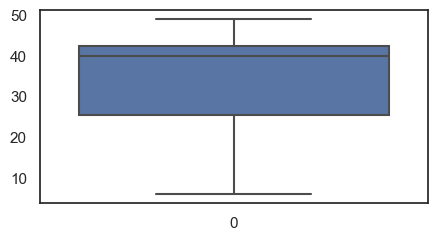

In [127]:
plt.rcParams['figure.figsize'] = [5, 2.5]
sns.boxplot(data=odd_data)

In [128]:
# numpy array summary statsitsics mean(), median(), amin(), amax(), ptp() is range of data, war(), std()
np.median(odd_data)

40.0

In [129]:
np.std(odd_data)

15.134657288477642

In [130]:
#  pandas has a .describe attribute, so convert the np.array to a pd.dataframe
odd_data_df=pd.DataFrame(odd_data)
odd_data_df

,0
0,6
1,7
2,15
3,36
4,39
5,40
6,41
7,42
8,43
9,47


In [131]:
odd_data_df.describe()

,0
count,11.000000
mean,33.181818
std,15.873362
min,6.000000
25%,25.500000
50%,40.000000
75%,42.500000
max,49.000000


In [132]:
np.percentile(odd_data,[25,50,75],interpolation='midpoint')

array([25.5, 40. , 42.5])

# Quartiles
Tukey's hinge method of finding quartiles \
use median to divide the ordered data into two halves \
If odd number in the dataset, include the median in both halves \
the lower quantiles is the median of the lower half, and the upper quantile is the median of the upper half \
if even number, split the original ordered data in half and find the median of the lower half and the upper half

For the odd data above:  Tukey's hinge:Q1=25.5 and Q3=42.5

The problem with this is that this is finding the quantiles for a disrete distribution and we are really thinking of these numbers as numerical values with a continuous distribution.  There are many interpolation methods for finding these percentiles.  One that is useful for engineers is to make sure that the quartiles land on a value from the dataset and you can use a nearest rank method (the percentile * the number of observations and then round to the next observation number).  For odd data above:  Nearest rank neighbor:  Q1=15, Q3=43

Another way is the use an interpolation method to model between adjacent ranks.  The numpy percentile call will do this with a default of interpolation='linear'.  For even number of observations in your data, this will matter.  For the odd data above:  Q1= 25.5; Q3=42.5

Note: For populations following a normal distribution, you can use the percentiles/percent point function (the quantile function) using the normal distribution to find the value of x at which 25% o 50% or 75% of the area under the standard normal curve is accouted for. The above distrubution is not normal. 

In [133]:
np.percentile(odd_data,[25,50,75],interpolation='linear')

array([25.5, 40. , 42.5])

In [134]:
from scipy.stats import norm
norm.ppf(0.25,loc=33.2,scale=15.9)

22.475612971882306

# population and sample standard deviation

$\sigma = \sqrt{\frac{1}{n} \displaystyle\sum_{i=1}^{n} (x_i - \bar{x})^2}$

Population standard deviation is a measure of the average distance between the values of the data in the set and the mean; it is calculated as the square root of the sum of the squared deviations from the mean divided by the number of obseravtions

$s = \sqrt{\frac{1}{n-1} \displaystyle\sum_{i=1}^{n} (x_i - \bar{x})^2}$

Sample standard deviation is the square root of the Bessel's corrected sample variance (an unbiased estimator of the variance), the sqaure root of the the sum of the squared deviations from the mean divided by the number of observations-1

In [135]:
# The sample standard deviation using n-1 in the formula
mean_odd_data=np.mean(odd_data)
sum_of_squares_odd_data=np.sum((odd_data-mean_odd_data)**2)

In [136]:
n=len(odd_data)

In [137]:
sum_of_squares_odd_data

2519.6363636363635

In [138]:
np.sqrt(sum_of_squares_odd_data/(n-1))

15.873362478178224

In [139]:
# the pandas library uses n-1 as the default
# the numpy library uses n as the default for std

In [140]:
np.sqrt(sum_of_squares_odd_data/n)

15.134657288477642

# Boxplots

In [141]:
# looking at an even array of data
even_data=np.array([7,15,36,39,40,41])

In [142]:
even_data_df=pd.DataFrame(even_data)
even_data_df.describe()

,0
count,6.000000
mean,29.666667
std,14.773851
min,7.000000
25%,20.250000
50%,37.500000
75%,39.750000
max,41.000000


For Tukey's hinge:  Q1=15, Q3=40 \
For nearest rank:  Q1= 15; Q3=40 \
For interpolation methods:

In [143]:
np.percentile(even_data,[25,50,75],interpolation='linear')

array([20.25, 37.5 , 39.75])

In [144]:
np.percentile(even_data,[25,50,75],interpolation='midpoint')

array([25.5, 37.5, 39.5])

In [145]:
from scipy.stats import norm
norm.ppf(0.25,loc=29.7,scale=14.8)

19.71755169709799

# Boxplots

C:\Users\carol\AppData\Local\Temp\ipykernel_21364\3421155391.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',color='black', linewidth=0.1)


Text(0.5, 0, 'Odd number of data elements')

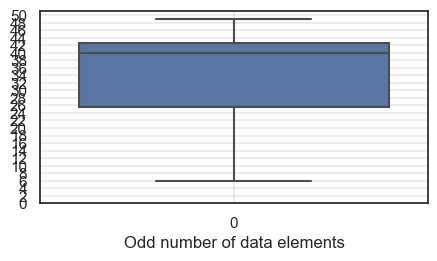

In [146]:
sns.boxplot(data=odd_data)
plt.yticks(np.arange(0,52,2))
plt.grid(b=True,which='major',color='black', linewidth=0.1)
plt.xlabel("Odd number of data elements")

5 number summary: min=6, Q1=25.5, Q2=40, Q3=42.5, max=49 \
Tukey's box and whisker plot:  as shown above \
box and whisker plot always have an actual value in the dataset as the wisker values
IQR = Q3-Q1= 17.0 \
1.5* 17.0= 25.5 \
Upper Whisker = Q3 + 25.5 = 68.0 \
Lower Whisker = Q1 - 25.5 = 0 \
The length of the upper whisker is the largest value that is no greater than the Q3+1.5* IQR.  Since there are no outliers, the upper whisker becomes the max value=49.  Same for the lower whisker.  Otherwise, the whisker is the largest or smallest points inside the range defined by the 1.5* IQR formula and then the values for the outliers are shown.    

C:\Users\carol\AppData\Local\Temp\ipykernel_21364\4027078649.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major',color='black', linewidth=0.1)


Text(0.5, -5.2500000000000036, 'admission wbc')

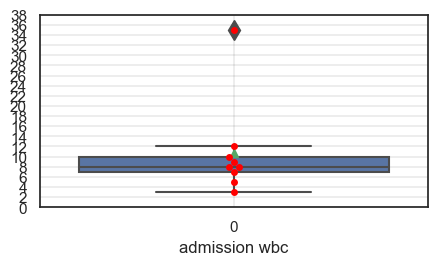

In [147]:
# Example from boxplot lecture
boxplotdata=np.array([3,5,7,8,8,9,10,12,35])
sns.boxplot(data=boxplotdata,fliersize=10,showmeans=True)
sns.swarmplot(data=boxplotdata,color="red")
plt.yticks(np.arange(0,40,2))
plt.grid(b=True,which='major',color='black', linewidth=0.1)
plt.xlabel("admission wbc")

In [148]:
boxplotdata_df=pd.DataFrame(boxplotdata)
boxplotdata_df.describe()

,0
count,9.000000
mean,10.777778
std,9.457507
min,3.000000
25%,7.000000
50%,8.000000
75%,10.000000
max,35.000000


In [149]:
np.percentile(boxplotdata,[25,50,75],interpolation='linear')

array([ 7.,  8., 10.])

Text(0.5, 0, 'wbc')

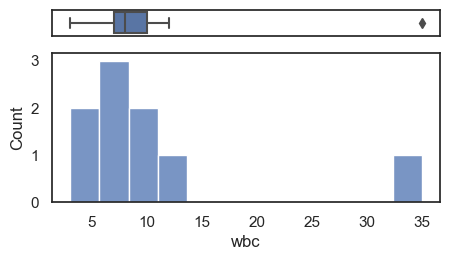

In [153]:
fig,(ax1,ax2)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(0.15,0.85)})
sns.boxplot(x=boxplotdata,ax=ax1)
sns.histplot(data=boxplotdata,ax=ax2)
plt.xlabel("wbc")

## Histograms

In [154]:
histdata=np.array([38,50,38,40,35,52,45,50,40,32,40,47,70,55,51])

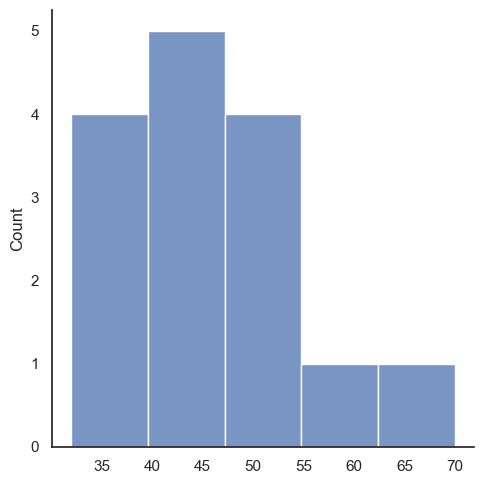

In [155]:
sns.displot(histdata, stat='count')

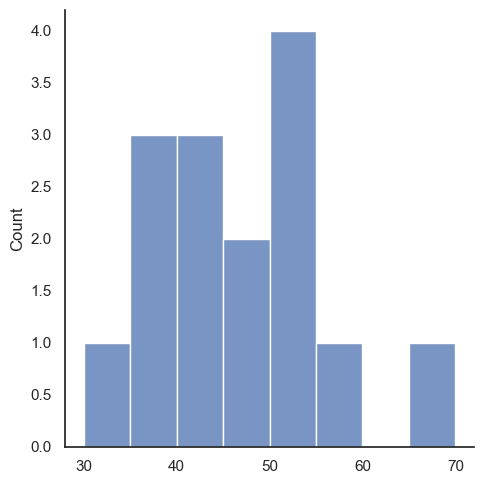

In [161]:
sns.displot(histdata, stat='count', bins=[30,35,40,45,50,55,60,65,70])

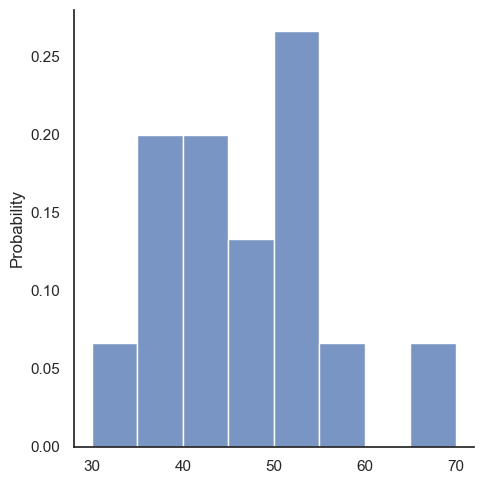

In [162]:
sns.displot(histdata, stat='probability', bins=[30,35,40,45,50,55,60,65,70])

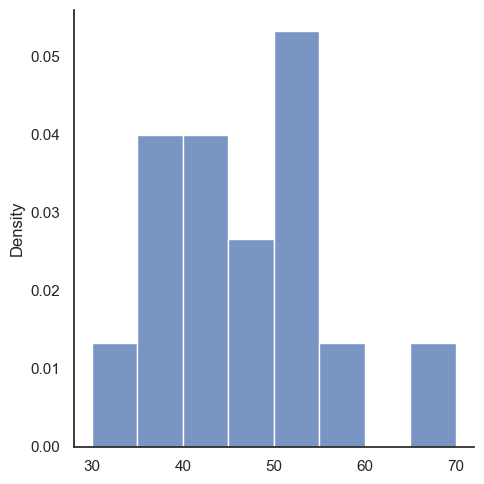

In [163]:
sns.displot(histdata, stat='density', bins=[30,35,40,45,50,55,60,65,70])